# Clean Data from Youngbin Adolescent/Adult SGT Experiment

#### See 2014 SGT Paper: [https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0107621&type=printable]

In [1]:
import numpy as np
import pandas as pd
import pystan
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in data from all given excel spreadsheets
df_block1all = pd.read_excel("Data/block1.xlsx", header=1)
df_block1_16003 = pd.read_excel("Data/block1_16003.xlsx", header=1)
df_block2all = pd.read_excel("Data/block2.xlsx", header=1)
df_block2_16003 = pd.read_excel("Data/block2_16003.xlsx", header=1)
df_block3all = pd.read_excel("Data/block3.xlsx", header=1)
df_block3_16003 = pd.read_excel("Data/block3_16003.xlsx",header=1)
df_block4all = pd.read_excel("Data/block4.xlsx", header=1)
df_block5all = pd.read_excel("Data/block5.xlsx",header=1)

In [3]:
df_block1_before16003 = df_block1all[df_block1all.Subject<16003]
df_block1_after16003 = df_block1all[df_block1all.Subject>16003]

df_block2_before16003 = df_block2all[df_block2all.Subject<16003]
df_block2_after16003 = df_block2all[df_block2all.Subject>16003]

df_block3_before16003 = df_block3all[df_block3all.Subject<16003]
df_block3_after16003 = df_block3all[df_block3all.Subject>16003]

df_block4_before16003 = df_block4all[df_block4all.Subject<16003]
df_block4_after16003 = df_block4all[df_block4all.Subject>16003]

df_block5_before16003 = df_block5all[df_block5all.Subject<16003]
df_block5_after16003 = df_block5all[df_block5all.Subject>16003]

In [4]:
df_block4_16003 = df_block3_16003.copy()
df_block4_16003["Tokens.RESP"] = np.nan
df_block4_16003["Tokens.RT"] = -1
df_block4_16003["var_Ch"] = -1
df_block4_16003["var_P"] = -1

df_block5_16003 = df_block3_16003.copy()
df_block5_16003["Tokens.RESP"] = np.nan
df_block5_16003["Tokens.RT"] = -1
df_block5_16003["var_Ch"] = -1
df_block5_16003["var_P"] = -1

In [5]:
df_block1 = df_block1_before16003.append([df_block1_16003, df_block1_after16003], ignore_index=True)
df_block2 = df_block2_before16003.append([df_block2_16003, df_block2_after16003], ignore_index=True)
df_block3 = df_block3_before16003.append([df_block3_16003, df_block3_after16003], ignore_index=True)
df_block4 = df_block4_before16003.append([df_block4_16003, df_block4_after16003], ignore_index=True)
df_block5 = df_block5_before16003.append([df_block5_16003, df_block5_after16003], ignore_index=True)

In [6]:
df = df_block1.append([df_block2, df_block3, df_block4, df_block5],ignore_index=True)

In [7]:
def getAgeGroup(row):
    return int(str(row["Subject"])[2])

In [8]:
df["AgeGroup"] = df.apply(getAgeGroup,axis=1)

In [9]:
df["Trial"] = np.concatenate([np.arange(80)]*320) + 1

In [10]:
df["BlockNum"] = ((([1]*80) + ([2]*80) + ([3]*80) + ([4]*80) + ([5]*80))*64)

In [11]:
def convertChoiceType(row):
    """
    Convert response to the following:
    #1 = self loss friend loss
    #2 = self loss friend win
    #3 = self win friend loss
    #4 = self win friend win
    """
    
    convertedChoices = 0
    
    if row["Tokens.RESP"] == 'q':
        if row["BlockNum"] == 1:
            convertedChoices = 1
        elif row["BlockNum"] == 2:
            convertedChoices = 2
        elif row["BlockNum"] == 3:
            convertedChoices = 3
        elif row["BlockNum"] == 4:
            convertedChoices = 1
        elif row["BlockNum"] == 5:
            convertedChoices = 2
    elif row["Tokens.RESP"] == 'p':
        if row["BlockNum"] == 1:
            convertedChoices = 2
        elif row["BlockNum"] == 2:
            convertedChoices = 3
        elif row["BlockNum"] == 3:
            convertedChoices = 4
        elif row["BlockNum"] == 4:
            convertedChoices = 4
        elif row["BlockNum"] == 5:
            convertedChoices = 4
    elif row["Tokens.RESP"] == 's':
        if row["BlockNum"] == 1:
            convertedChoices = 4
        elif row["BlockNum"] == 2:
            convertedChoices = 4
        elif row["BlockNum"] == 3:
            convertedChoices = 2
        elif row["BlockNum"] == 4:
            convertedChoices = 2
        elif row["BlockNum"] == 5:
            convertedChoices = 3
    elif row["Tokens.RESP"] == 'l':
        if row["BlockNum"] == 1:
            convertedChoices = 3
        elif row["BlockNum"] == 2:
            convertedChoices = 1
        elif row["BlockNum"] == 3:
            convertedChoices = 1
        elif row["BlockNum"] == 4:
            convertedChoices = 3
        elif row["BlockNum"] == 5:
            convertedChoices = 1
    return convertedChoices

In [12]:
df["Choices"] = df.apply(convertChoiceType,axis=1)

In [13]:
df.rename(columns={'var_Ch':'Outcome_Friend'}, inplace=True)
df.rename(columns={'var_P': "Outcome_Self"},inplace=True)
df.rename(columns={'Subject': "subID_youngbin"},inplace=True)

In [14]:
subdict = {}
for i in np.arange(df.subID_youngbin.nunique()):
    subdict[i+1] = df.subID_youngbin.unique()[i]

In [15]:
def findNewID(row):
    return np.where(df["subID_youngbin"].unique() == row["subID_youngbin"])[0][0]

In [16]:
df["Subject"] = df.apply(findNewID,axis=1)
df["Subject"] = df["Subject"] + 1

In [17]:
df['AgeGroup'] = df['AgeGroup'].map({0:1, 2:2})

In [18]:
df.head()

,subID_youngbin,Tokens.RESP,Tokens.RT,Outcome_Friend,Outcome_Self,AgeGroup,Trial,BlockNum,Choices,Subject
0,16001,q,690,4,-4,1,1,1,1,1
1,16001,l,883,-4,2,1,2,1,3,1
2,16001,l,679,-2,4,1,3,1,3,1
3,16001,p,288,2,-2,1,4,1,2,1
4,16001,s,712,-2,4,1,5,1,4,1


### Make a dictionary of data for Stan

In [19]:
ddict = {}
ddict['N'] = df.shape[0]
ddict['Nsub'] = len(df['Subject'].unique())
ddict['Ncue'] = df["Choices"].nunique()-1
ddict['Ntrial'] = np.max(df['Trial'])
ddict['Ngroup'] = df['AgeGroup'].nunique()
ddict['sub'] = df['Subject'].values
ddict['chosen'] = df['Choices'].values
#ddict['unchosen'] = df['Unchosen'].fillna(0).astype('int')
ddict['trial'] = df['Trial'].values
ddict['outcomeFriend'] = df['Outcome_Friend'].values
ddict['outcomeSelf'] = df['Outcome_Self'].values
ddict['group'] = df[['AgeGroup', 'Subject']].drop_duplicates()['AgeGroup'].values

In [20]:
np.random.seed(21314)

In [21]:
def initfun():
    return {'beta': np.ones((ddict['Nsub'],)), 
            'alpha':  np.ones((ddict['Nsub'],)),
            'lambda': np.random.rand(ddict['Nsub']),
            'a': np.ones((ddict['Ngroup'],)),
            'b': np.ones((ddict['Ngroup'],))}

In [22]:
sm = pystan.StanModel(file='SGT_RL.stan')
fit = sm.sampling(data=ddict, chains=2, init=initfun)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_4d9a52f13cab0fd7ce8becac9f969efa NOW.
/home/krm58/anaconda3/lib/python3.6/site-packages/pystan/misc.py:362: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(np.asarray(v).dtype, int):
/home/krm58/anaconda3/lib/python3.6/site-packages/pystan/misc.py:364: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
/home/krm58/anaconda3/lib/python3.6/site-packages/pystan/misc.py:364: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [23]:
samples = fit.extract()

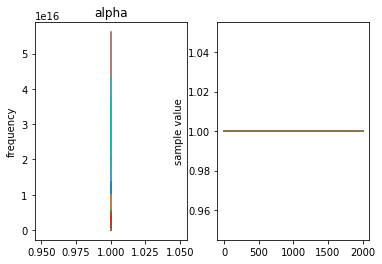

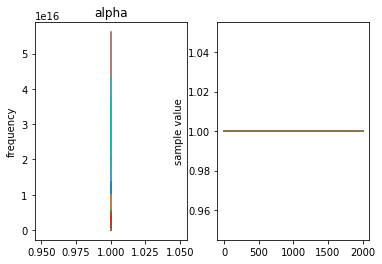

In [24]:
fit.plot('alpha')

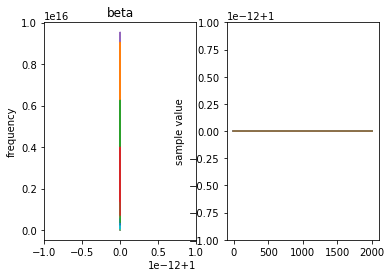

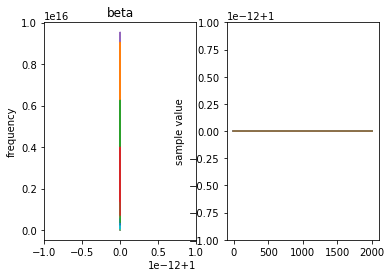

In [25]:
fit.plot('beta')

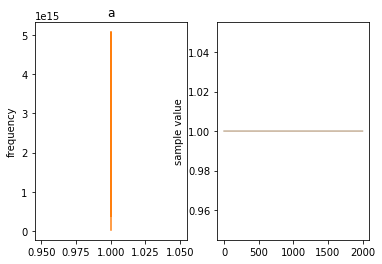

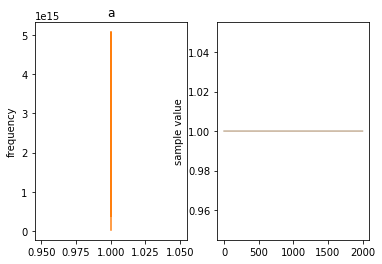

In [26]:
fit.plot('a')

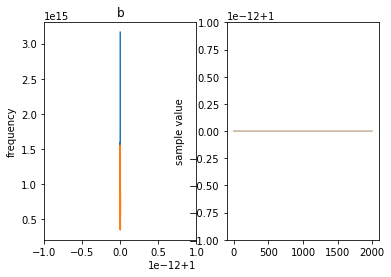

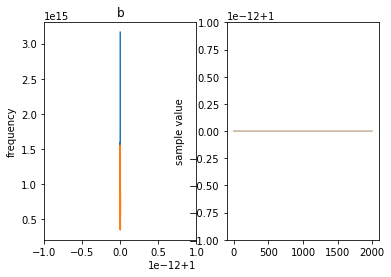

In [27]:
fit.plot('b')

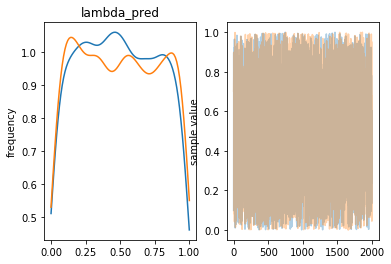

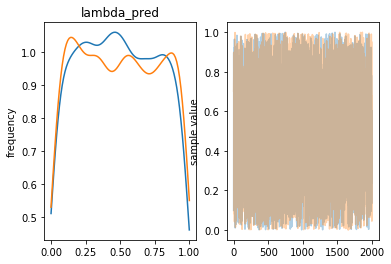

In [28]:
fit.plot('lambda_pred')

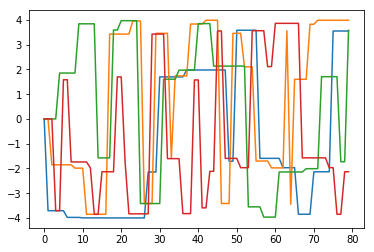

In [29]:
subj = 0
plt.plot(np.mean(samples['Qfriend'], 0)[subj]);

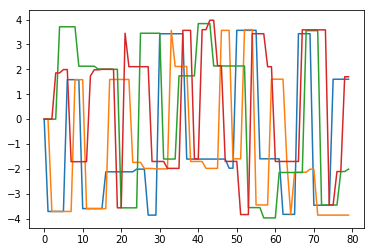

In [30]:
subj = 0
plt.plot(np.mean(samples['Qself'], 0)[subj]);